In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
df = pd.read_csv('RUL_Train_001.csv')

In [4]:
df

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [5]:
df[df['RUL']==0]

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
191,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,21.61,...,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,0
478,287,-0.0005,0.0006,100.0,518.67,643.85,1608.50,1430.84,14.62,21.61,...,2388.21,8175.57,8.5365,0.03,398,2388,100.0,38.43,23.0848,0
657,179,0.0012,0.0000,100.0,518.67,643.51,1604.80,1428.23,14.62,21.61,...,2388.20,8255.34,8.5056,0.03,398,2388,100.0,38.40,22.9562,0
846,189,-0.0024,-0.0002,100.0,518.67,644.53,1612.11,1432.55,14.62,21.61,...,2388.16,8259.42,8.5246,0.03,398,2388,100.0,38.44,23.1006,0
1115,269,0.0022,0.0003,100.0,518.67,643.46,1597.28,1430.74,14.62,21.61,...,2388.16,8212.75,8.5209,0.03,397,2388,100.0,38.45,23.0296,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19887,336,-0.0031,-0.0005,100.0,518.67,643.74,1599.20,1432.12,14.62,21.61,...,2388.24,8144.03,8.5022,0.03,397,2388,100.0,38.36,23.0258,0
20089,202,0.0014,0.0001,100.0,518.67,643.79,1610.66,1427.41,14.62,21.61,...,2388.15,8263.63,8.5277,0.03,397,2388,100.0,38.29,23.1184,0
20245,156,0.0077,-0.0003,100.0,518.67,643.02,1603.77,1432.16,14.62,21.61,...,2388.26,8122.22,8.5308,0.03,396,2388,100.0,38.33,23.1137,0
20430,185,-0.0019,-0.0004,100.0,518.67,643.93,1598.42,1421.56,14.62,21.61,...,2388.24,8127.53,8.5425,0.03,397,2388,100.0,38.49,23.1931,0


In [6]:
df = pd.read_csv('RUL_Train_002.csv')
df

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
0,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,8.00,...,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,148
1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,5.71,...,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,147
2,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,9.02,...,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,146
3,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,5.71,...,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,145
4,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,9.03,...,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,13.66,...,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189,4
53755,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,15.50,...,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454,3
53756,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,9.04,...,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503,2
53757,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,9.04,...,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729,1


In [7]:
df[df['RUL']==0]

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
148,149,42.0017,0.8414,100.0,445.00,550.49,1366.01,1149.81,3.91,5.71,...,2387.40,8066.19,9.4765,0.02,332,2212,100.0,10.45,6.2285,0
417,269,42.0047,0.8411,100.0,445.00,550.11,1368.75,1146.65,3.91,5.72,...,2388.42,8110.26,9.4315,0.02,334,2212,100.0,10.56,6.2615,0
623,206,42.0073,0.8400,100.0,445.00,550.80,1356.97,1144.89,3.91,5.72,...,2387.87,8082.25,9.4962,0.02,333,2212,100.0,10.46,6.3349,0
858,235,0.0030,0.0007,100.0,518.67,643.68,1605.86,1428.21,14.62,21.61,...,2388.17,8215.14,8.5784,0.03,397,2388,100.0,38.47,22.9717,0
1012,154,42.0049,0.8408,100.0,445.00,550.53,1364.82,1146.87,3.91,5.72,...,2389.19,8151.36,9.4339,0.02,333,2212,100.0,10.74,6.3906,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52785,163,0.0019,0.0003,100.0,518.67,643.15,1597.21,1425.84,14.62,21.61,...,2388.29,8128.22,8.5586,0.03,396,2388,100.0,38.62,23.0771,0
53094,309,42.0077,0.8411,100.0,445.00,550.84,1369.00,1146.53,3.91,5.72,...,2389.50,8171.37,9.4156,0.02,336,2212,100.0,10.47,6.3085,0
53237,143,9.9984,0.2500,100.0,489.05,606.05,1513.93,1326.79,10.52,15.50,...,2388.46,8124.16,8.7392,0.03,372,2319,100.0,28.32,16.9473,0
53442,205,41.9989,0.8405,100.0,445.00,550.60,1366.52,1149.97,3.91,5.71,...,2387.73,8075.91,9.4882,0.02,333,2212,100.0,10.30,6.2778,0


In [8]:
df = pd.read_csv('RUL_Train_003.csv')
df

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
0,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,21.61,...,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,258
1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,21.61,...,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,257
2,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,21.61,...,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,256
3,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,21.61,...,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,255
4,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,21.61,...,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,21.61,...,2388.30,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631,4
24716,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,21.61,...,2388.28,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746,3
24717,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,21.61,...,2388.24,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682,2
24718,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,21.61,...,2388.26,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753,1


In [9]:
df[df['RUL']==0]

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
258,259,0.0043,-0.0001,100.0,518.67,643.94,1599.54,1434.33,14.62,21.61,...,2388.23,8149.15,8.5313,0.03,398,2388,100.0,38.35,23.0707,0
511,253,-0.0023,0.0004,100.0,518.67,643.35,1595.93,1419.99,14.62,21.58,...,2388.51,8190.81,8.2588,0.03,397,2388,100.0,39.72,23.8854,0
733,222,-0.0015,-0.0002,100.0,518.67,644.23,1598.25,1424.21,14.62,21.61,...,2388.17,8163.26,8.5020,0.03,396,2388,100.0,38.37,23.1134,0
1005,272,0.0010,0.0004,100.0,518.67,643.67,1597.02,1426.14,14.62,21.61,...,2388.34,8116.35,8.5314,0.03,397,2388,100.0,38.42,23.0814,0
1218,213,-0.0017,-0.0005,100.0,518.67,643.58,1608.57,1437.97,14.62,21.61,...,2388.21,8178.97,8.5134,0.03,397,2388,100.0,38.23,23.0320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23840,491,-0.0034,-0.0001,100.0,518.67,642.87,1604.35,1427.42,14.62,21.58,...,2388.49,8191.36,8.2401,0.03,397,2388,100.0,39.79,23.7092,0
24115,275,0.0001,0.0001,100.0,518.67,643.51,1612.52,1422.49,14.62,21.60,...,2388.53,8190.97,8.2411,0.03,395,2388,100.0,39.55,23.8974,0
24422,307,0.0023,0.0001,100.0,518.67,643.31,1602.30,1425.69,14.62,21.58,...,2388.51,8191.37,8.2294,0.03,397,2388,100.0,39.58,23.7692,0
24567,145,-0.0013,0.0002,100.0,518.67,644.15,1603.96,1417.99,14.62,21.61,...,2388.26,8138.32,8.5138,0.03,396,2388,100.0,38.37,23.1498,0


In [10]:
df = pd.read_csv('RUL_Train_004.csv')
df

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
0,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,320
1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,319
2,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,318
3,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,317
4,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,15.46,...,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234,4
61245,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,21.57,...,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151,3
61246,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,21.57,...,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270,2
61247,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,7.96,...,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774,1


In [11]:
df[df['RUL']==0]

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
320,321,42.0058,0.8400,100.0,445.00,549.71,1368.61,1147.00,3.91,5.70,...,2388.61,8138.46,9.1322,0.02,335,2212,100.00,10.81,6.4590,0
619,299,42.0006,0.8407,100.0,445.00,550.21,1375.30,1150.95,3.91,5.72,...,2388.03,8090.70,9.4679,0.02,335,2212,100.00,10.45,6.2911,0
926,307,42.0028,0.8410,100.0,445.00,549.78,1365.95,1143.62,3.91,5.70,...,2388.60,8140.69,9.0744,0.02,334,2212,100.00,10.83,6.4499,0
1200,274,42.0072,0.8400,100.0,445.00,550.58,1371.44,1153.02,3.91,5.72,...,2389.42,8160.97,9.4162,0.02,334,2212,100.00,10.43,6.2721,0
1393,193,42.0047,0.8400,100.0,445.00,551.00,1356.73,1149.10,3.91,5.72,...,2389.23,8151.60,9.3908,0.02,333,2212,100.00,10.33,6.2168,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60437,205,10.0029,0.2512,100.0,489.05,605.93,1511.36,1332.77,10.52,15.50,...,2388.45,8135.16,8.7680,0.03,372,2319,100.00,28.10,16.9863,0
60598,161,25.0007,0.6200,60.0,462.54,537.38,1268.28,1066.95,7.05,9.03,...,2027.69,7861.09,11.0271,0.02,309,1915,84.93,14.07,8.5428,0
60809,211,42.0065,0.8414,100.0,445.00,550.20,1366.48,1142.27,3.91,5.69,...,2388.62,8142.68,9.1091,0.02,333,2212,100.00,10.64,6.4936,0
60993,184,0.0013,0.0001,100.0,518.67,643.50,1602.12,1430.34,14.62,21.61,...,2388.33,8120.43,8.4998,0.03,395,2388,100.00,38.48,23.0767,0


In [12]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [13]:

regressor = RandomForestRegressor()

regressor.fit(X_train,y_train)

RandomForestRegressor()

Training plot

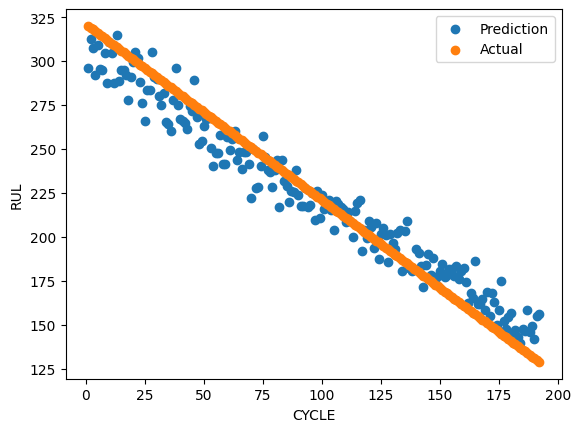

RMSE on Train set: 18.645849369830888


In [14]:

y_pred = regressor.predict(X_train)


plt.scatter(X_train['Cycle'][0:192],y_pred[0:192])
plt.scatter(X_train['Cycle'][0:192],np.array(y_train)[0:192])
plt.ylabel('RUL')
plt.xlabel('CYCLE')
plt.legend(['Prediction', 'Actual'], loc='upper right')
plt.show()


print('RMSE on Train set:', np.sqrt(metrics.mean_squared_error(y_train ,y_pred)))

Testing plot

RMSE on Test set: 49.321371410911325


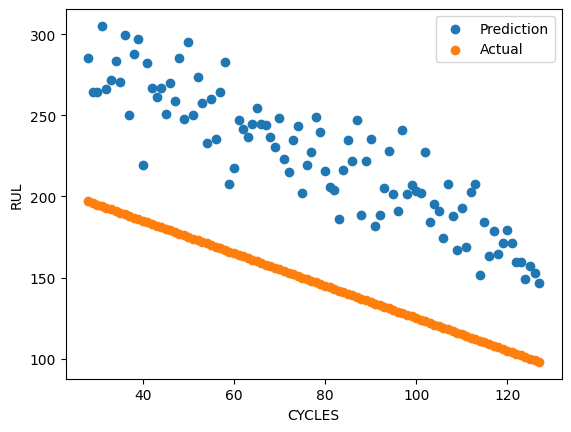

In [15]:
y_pred = regressor.predict(X_test)

print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.scatter(X_test['Cycle'][100:200],y_pred[100:200])
plt.scatter(X_test['Cycle'][100:200],np.array(y_test)[100:200])
plt.legend(['Prediction', 'Actual'], loc='upper right')
plt.ylabel('RUL')
plt.xlabel('CYCLES')
plt.show()